<a href="https://colab.research.google.com/github/CamilaNanini/ModelosYSimulacionFamaf2025/blob/main/Practico6MyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

In [ ]:
import random
import math

NV_MAGICCONST = 4 * math.exp(-0.5) / math.sqrt(2.0)
def normalvariate(mu=0, sigma=1):
  while True:
    u1 = random.random()
    u2 = 1.0 - random.random()
    z = NV_MAGICCONST * (u1 - 0.5) / u2
    zz = z * z / 4.0
    if zz <= -math.log(u2):
      break
  return mu + z * sigma

def get_sample(d=0.1):
  X = normalvariate()
  sample = [X]
  mediaX = X
  Scuad = 0
  n = 1
  while (n < 100 or math.sqrt(Scuad/n) >= d):
    n += 1
    X = normalvariate()
    sample.append(X)
    media_ant = mediaX
    mediaX = media_ant + (X - media_ant) / n
    Scuad = Scuad * (1-1/(n-1))+n*(mediaX-media_ant)**2
  return sample, mediaX, Scuad


sample = get_sample()
datos = sample[0]
sample_mean = sample[1]
sample_var = sample[2]
print("Numero de datos generados: n = ",len(datos))
print("Media muestral: ",sample_mean)
print("Varianza muestral: ",sample_var)
print("Los datos")
print(datos)

Numero de datos generados: n =  110
Media muestral:  0.06135277124189475
Varianza muestral:  1.0983939684208344
Los datos
[-0.47475972624424184, 1.9301747850979218, -1.637348846055655, -0.9068255970832878, -0.8218341245325507, 0.6458448743433682, 0.3922634350046761, 0.03795424699699025, 1.3520778953880959, 1.2276510623516612, 1.0661269609864992, -1.708052886658082, -1.5105274807762548, 0.9582324791373665, 0.5914364553688395, -0.6217233806948486, 0.0038868431893270884, -0.5131163823177395, 0.4649784846907174, -1.0338406501976023, 0.7285659495324274, 1.0521494226953645, -1.5792396122294996, -0.4457311427576591, 1.2784224010103837, 0.9105315793491167, 0.10425846626093974, -0.8162633476825433, -0.5947175920920325, 0.3732275348392648, 1.373911910046652, -1.684373304728482, -0.7808383823638733, 0.6738127538313066, -0.931769624307418, 1.035958925566573, 1.0569050457629885, -0.7680764175980087, 1.1315354234273067, -0.04176015782018302, -1.4038672364813747, 3.3400974310299794, 0.887757516232058

# Ejercicio 2

In [ ]:
import numpy as np
from random import random

def g1(x):
  return math.exp(x) / math.sqrt(2*x)

def g2(x):
    return x**2 * np.exp(-x**2)

def g2_01(y):
    # Reemplazo de variable x = 1/y - 1, dx = - 1/y**2 dy
    x = (1/y-1)
    dx = (y**2)
    return 2 * g2(x) / dx

def get_sample(fun,d=0.1):
  mediaX = fun(random())
  Scuad = 0
  n = 1
  while (n < 100 or math.sqrt(Scuad/n) >= d):
    n += 1
    X = fun(random())
    media_ant = mediaX
    mediaX = media_ant + (X - media_ant) / n
    Scuad = Scuad * (1-1/(n-1))+n*(mediaX-media_ant)**2
  return n, mediaX, Scuad

i1,mean1,var1 = get_sample(g1, 0.01)
print(f"Para g1 tenemos {i1} simulaciones y {mean1} de media, siendo que el valor real es 2.068501931")


i2,mean2,var2 = get_sample(g2_01, 0.01)
print(f"Para g2 tenemos {i2} simulaciones y {mean2} de media, siendo que el valor real es 0.886226925453")


Para g1 tenemos 37770 simulaciones y 2.060983519711329 de media, siendo que el valor real es 2.068501931
Para g2 tenemos 12777 simulaciones y 0.893145318651817 de media, siendo que el valor real es 0.886226925453


# Ejercicio 3

In [ ]:
from random import random
import math
from scipy.stats import norm

def integral_i(u):
    x = u * math.pi + math.pi
    dx = math.pi
    return (math.sin(x) / x) * dx

def integral_ii(u):
    x = (1 / u - 1)
    dx = 1/(u**2)
    return (3 / (3 + x**4)) * dx

def Media_Muestral_X(fun,z_alfa_2, L):
  d = L / (2 * z_alfa_2)
  Media = fun(random())
  Scuad, n = 0, 1
  while n <= 100 or math.sqrt(Scuad / n) > d:
    n += 1
    X = fun(random())
    Media_Ant = Media
    Media = Media_Ant + (X - Media_Ant) / n
    Scuad = Scuad * (1 - 1 /(n-1)) + n*(Media - Media_Ant)**2
    if(n==1000):
      print(f"\nNúmero de simulaciones: {n}")
      print(f"Estimación final: {round(Media, 4)}")
      print(f"Estimación varianza muestral: {round(Scuad, 4)}")
      print(f"Intervalo de confianza: ({round(Media - 1.96 * math.sqrt(Scuad) / math.sqrt(n), 4)}, {round(Media + 1.96 * math.sqrt(Scuad) / math.sqrt(n), 4)})")
    elif(n==5000):
      print(f"\nNúmero de simulaciones: {n}")
      print(f"Estimación final: {round(Media, 4)}")
      print(f"Estimación varianza muestral: {round(Scuad, 4)}")
      print(f"Intervalo de confianza: ({round(Media - 1.96 * math.sqrt(Scuad)/ math.sqrt(n), 4)}, {round(Media + 1.96 * math.sqrt(Scuad) / math.sqrt(n), 4)})")
    elif(n==7000):
      print(f"\nNúmero de simulaciones: {n}")
      print(f"Estimación final: {round(Media, 4)}")
      print(f"Estimación varianza muestral: {round(Scuad, 4)}")
      print(f"Intervalo de confianza: ({round(Media - 1.96 * math.sqrt(Scuad)/ math.sqrt(n), 4)}, {round(Media + 1.96 * math.sqrt(Scuad) / math.sqrt(n), 4)})")
  return n,Scuad,Media

L = 2*0.001
cf = 0.95
z_alfa_2 = norm.ppf(1-((1-cf)/2))
print(z_alfa_2)
print("Valor real para la integral 1 = -0.43379")
Media_Muestral_X(integral_i,z_alfa_2,L)
print("\nValor real para la integral 2 = 1.4618")
Media_Muestral_X(integral_ii,z_alfa_2,L)

1.959963984540054
Valor real para la integral 1 = -0.43379

Número de simulaciones: 1000
Estimación final: -0.4373
Estimación varianza muestral: 0.0454
Intervalo de confianza: (-0.4505, -0.4241)

Número de simulaciones: 5000
Estimación final: -0.4311
Estimación varianza muestral: 0.0443
Intervalo de confianza: (-0.437, -0.4253)

Número de simulaciones: 7000
Estimación final: -0.4315
Estimación varianza muestral: 0.0441
Intervalo de confianza: (-0.4364, -0.4266)

Valor real para la integral 2 = 1.4618

Número de simulaciones: 1000
Estimación final: 1.4143
Estimación varianza muestral: 0.9947
Intervalo de confianza: (1.3525, 1.4761)

Número de simulaciones: 5000
Estimación final: 1.4384
Estimación varianza muestral: 0.961
Intervalo de confianza: (1.4113, 1.4656)

Número de simulaciones: 7000
Estimación final: 1.4459
Estimación varianza muestral: 0.9517
Intervalo de confianza: (1.4231, 1.4688)


(3662681, 0.9534609094899382, 1.4615876466393973)

# Ejercicio 4

In [ ]:
from random import random

def N():
  s = 0
  m = 0
  while s <= 1:
    s += random()
    m += 1
  return m

def get_sample(Nsim):
  X = N()
  mediaX = X
  Scuad = 0
  for n in range(2,Nsim):
    X = N()
    media_ant = mediaX
    mediaX = media_ant + (X - media_ant) / n
    Scuad = Scuad * (1-1/(n-1))+n*(mediaX-media_ant)**2
  return mediaX, Scuad

Nsim = 1000
sample = get_sample(Nsim)
media = sample[0]
scuad = sample[1]
S = math.sqrt(scuad)

print("Estimacion de N_bar con 1000 simulaciones",round(media,4))
print(f"Intervalo de confianza: ({round(media-1.96*S/math.sqrt(Nsim),4)},{round(media+1.96*S/math.sqrt(Nsim),4)})")
print("Varianza muestral: ",scuad/Nsim)

Estimacion de N_bar con 1000 simulaciones 2.7347
Intervalo de confianza: (2.6794,2.7901)
Varianza muestral:  0.0007983013073193391


#Ejercicio 5

In [ ]:
from random import random
import math

def M():
    u_ant = random()
    u_sig = random()
    m = 2
    while u_sig >= u_ant:
        m += 1
        u_ant = u_sig
        u_sig = random()
    return m
#C
def estimacion_varianza(d=0.1):
  mediaX = M()
  Scuad = 0
  n = 1
  while (n < 100 or math.sqrt(Scuad/n) >= d):
    n += 1
    X = M()
    media_ant = mediaX
    mediaX = media_ant + (X - media_ant) / n
    Scuad = Scuad * (1-1/(n-1))+n*(mediaX-media_ant)**2
  return mediaX, Scuad

#d
def estimacion_ic(z_alfa_2, L):
    d = L / (2 * z_alfa_2)
    Media = M()
    Scuad, n = 0, 1
    while n < 100 or math.sqrt(Scuad / n) > d:
        n += 1
        X = M()
        Media_Ant = Media
        Media = Media_Ant + (X - Media_Ant) / n
        Scuad = Scuad * (1 - 1 /(n-1)) + n*(Media - Media_Ant)**2
    return n, Media, Scuad

mean, var_estimator = estimacion_varianza()
print("Punto C")
print(f"La estimacion de e es: {mean}")
print(f"La varianza es: {var_estimator}")


L = 0.1
cf = 0.95
z_alfa_2 = norm.ppf(1-((1-cf)/2))
n, mean, scuad = estimacion_ic(z_alfa_2, L)
print("Punto D")
print(f"La estimacion de e es: {mean}")
print(f"La varianza es: {scuad}")
print(f"El ic es = ({mean - 1.96 * math.sqrt(scuad) / math.sqrt(n)}, {mean + 1.96 * math.sqrt(scuad) / math.sqrt(n)})")
print(f"Se hicieron {n} iteraciones")

Punto C
La estimacion de e es: 2.769999999999999
La varianza es: 0.7849494949494931
Punto D
La estimacion de e es: 2.7461139896373092
La varianza es: 0.7531179887237427
El ic es = (2.696129725572218, 2.7960982537024006)
Se hicieron 1158 iteraciones


#Ejercicio 6

In [ ]:
from numpy.random import uniform
import math
from scipy.stats import norm

def punto():
    x, y = uniform(-1, 1), uniform(-1, 1)
    return x*x + y*y <= 1  # True si cae dentro del círculo

def estimacion_varianza(d=0.01):
  mediaX = punto()
  Scuad = 0
  n = 1
  while (n < 100 or math.sqrt(Scuad/n) >= d):
    n += 1
    X = punto()
    media_ant = mediaX
    mediaX = media_ant + (X - media_ant) / n
    Scuad = Scuad * (1-1/(n-1))+n*(mediaX-media_ant)**2
  return n, mediaX*4, Scuad
#El área total del cuadrado es 4 y el círculo es de radio 1.

# b)
def estimacion_ic(z_alfa_2, L):
    d = L / (2 * z_alfa_2)
    Media = punto()
    Scuad, n = 0, 1
    while n < 100 or math.sqrt(Scuad / n) > d:
        n += 1
        X = punto()
        Media_Ant = Media
        Media = Media_Ant + (X - Media_Ant) / n
        Scuad = Scuad * (1 - 1 /(n-1)) + n*(Media - Media_Ant)**2
    return n, Media*4, Scuad

# Parte a
n, media, scuad = estimacion_varianza()
print("a) Estimación de π por varianza:")
print(f"π ≈ {media}, varianza del estimador ≈ {scuad}, muestras: {n}")

# Parte b
L = 0.1
cf = 0.95
z_alfa_2 = norm.ppf(1-((1-cf)/2))
print(z_alfa_2)
n, mean, scuad = estimacion_ic(z_alfa_2, L)
print("\nb) Estimación de π por intervalo de confianza:")
print(f"π ≈ {mean} con {n} muestras y varianza de {scuad} ")
print(f"Intervalo = ({mean - 1.96 * math.sqrt(scuad) / math.sqrt(n)}, {mean + 1.96 * math.sqrt(scuad) / math.sqrt(n)})")


a) Estimación de π por varianza:
π ≈ 3.0783098591549254, varianza del estimador ≈ 0.1774279498864663, muestras: 1775
1.959963984540054

b) Estimación de π por intervalo de confianza:
π ≈ 3.2510638297872343 con 235 muestras y varianza de 0.15282778687033988 
Intervalo = (3.2010807166371427, 3.301046942937326)


#Ejercicio 7

#Ejercicio 8

In [ ]:
#Estimacion Boostrap ideal de Var(S_cuadrado)
def ideal_8(muestra_bootstrap):
  replicas = []
  for bi in muestra_bootstrap:
    replicas.append(np.var(bi, ddof=1))
  varianza = np.var(replicas)
  return varianza

muestra_bootstrap = [[1,1],[3,3],[1,3],[3,1]]
print("varianza empirica del estimador:",ideal_8(muestra_bootstrap))

def Muestra_boostrap(X):
    return np.random.choice(X, size=len(X), replace=True)

#Estima Var(S_cuadrado)
def ejercicio_8_a(X,N=100):
  replicas = []
  for i in range(N):
    muestra = Muestra_boostrap(X)
    replicas.append(np.var(muestra,ddof=1))
  varianza = np.var(replicas,ddof=1)
  return varianza

X = [1, 3]
print("Estimacion Boostrap de la varianza del estimador:", ejercicio_8_a(X))

varianza empirica del estimador: 1.0
Estimacion Boostrap de la varianza del estimador: 1.0101010101010102


In [ ]:
import numpy as np

# Función para generar una muestra bootstrap
def Muestra_boostrap(X):
    return np.random.choice(X, size=len(X), replace=True)

# Estima Var(S^2) usando bootstrap
def ejercicio_8_b(X, N=1000):
    replicas = []
    for i in range(N):
        muestra = Muestra_boostrap(X)
        s2 = np.var(muestra, ddof=1)
        replicas.append(s2)
    varianza = np.var(replicas, ddof=1)
    return varianza


X = [5, 4, 9, 6, 21, 17, 11, 20, 7, 10, 21, 15, 13, 16, 8]
print("Estimación bootstrap de Var(S^2):", ejercicio_8_b(X))

Estimación bootstrap de Var(S^2): 59.258382837803794


In [ ]:
import numpy as np

# Función para generar una muestra bootstrap
def Muestra_boostrap(X):
    return np.random.choice(X, size=len(X), replace=True)

# Estima Var(S^2) usando bootstrap
def ejercicio_8_a(X, N=100):
    replicas = []
    for i in range(N):
        muestra = Muestra_boostrap(X)
        s2 = np.var(muestra, ddof=1)
        replicas.append(s2)
    varianza = np.var(replicas, ddof=1)
    return varianza

# a)
X_a = [1, 3]
print("a) Estimación bootstrap de Var(S^2) para n=2:", ejercicio_8_a(X_a))

# b)
def ejercicio_8_b(X, N=1000):
    replicas = []
    for i in range(N):
        muestra = Muestra_boostrap(X)
        s2 = np.var(muestra, ddof=1)
        replicas.append(s2)
    varianza = np.var(replicas, ddof=1)
    return varianza

X_b = [5, 4, 9, 6, 21, 17, 11, 20, 7, 10, 21, 15, 13, 16, 8]
print("b) Estimación bootstrap de Var(S^2) para n=15:", ejercicio_8_b(X_b))

a) Estimación bootstrap de Var(S^2) para n=2: 1.0064646464646463
b) Estimación bootstrap de Var(S^2) para n=15: 59.32554997800522


#Ejercicio 9

Tiempo esperado de parada en las primeras 100 horas: 53.9008 horas


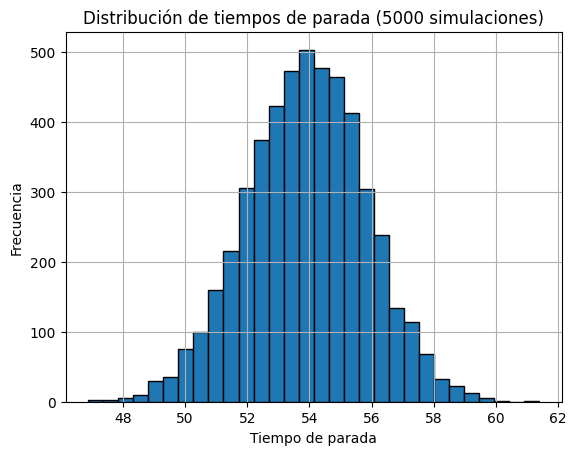

In [ ]:
import random
import math

def exponencial(lamda):
  U = 1-random.random()
  return -math.log(U)/lamda

def lambda_t(t):
    t_mod = t % 10
    if 0 <= t_mod < 5:
        return 4 + 3 * t_mod
    else:
        return 19 - 3 * (t_mod - 5)

def generar_poisson_no_homogeneo(T, lambda_max):
    t = 0
    eventos = []
    while t < T:
        u = random.random()
        t += -math.log(u) / lambda_max
        if t < T:
            d = random.random()
            if d < lambda_t(t) / lambda_max:
                eventos.append(t)
    return eventos

def simular_sistema(T):
    lambda_max = 19
    eventos_llegada = generar_poisson_no_homogeneo(T, lambda_max)
    eventos_llegada.sort()

    cola = []
    tiempo_actual = 0
    servidor_ocupado = False
    proxima_salida = None
    tiempos_parada = []

    idx_llegada = 0
    tiempo_fuera = 0

    while tiempo_actual < T:
        siguiente_llegada = eventos_llegada[idx_llegada] if idx_llegada < len(eventos_llegada) else float('inf')
        siguiente_evento = min(siguiente_llegada, proxima_salida if proxima_salida is not None else float('inf'))

        tiempo_actual = siguiente_evento

        if siguiente_evento == siguiente_llegada:
            if servidor_ocupado:
                cola.append(tiempo_actual)
            else:
                servidor_ocupado = True
                servicio = exponencial(25)
                proxima_salida = tiempo_actual + servicio
            idx_llegada += 1

        elif siguiente_evento == proxima_salida:
            if cola:
                servicio = exponencial(25)
                proxima_salida = tiempo_actual + servicio
                cola.pop(0)
            else:
                servidor_ocupado = False
                proxima_salida = None
                while True:
                    pausa = random.uniform(0, 0.3)
                    tiempo_actual += pausa
                    tiempo_fuera += pausa
                    if idx_llegada < len(eventos_llegada) and eventos_llegada[idx_llegada] <= tiempo_actual:
                        servidor_ocupado = True
                        servicio = exponencial(25)
                        proxima_salida = tiempo_actual + servicio
                        idx_llegada += 1
                        break
                    elif tiempo_actual >= T:
                        break
        if tiempo_actual >= T:
            break

    return tiempo_fuera
import matplotlib.pyplot as plt

def simulaciones(N, T):
    tiempos_fuera = []
    for _ in range(N):
        tiempo_fuera = simular_sistema(T)
        tiempos_fuera.append(tiempo_fuera)

    media = sum(tiempos_fuera) / N
    print(f"Tiempo esperado de parada en las primeras {T} horas: {media:.4f} horas")

    plt.hist(tiempos_fuera, bins=30, edgecolor='black')
    plt.title(f"Distribución de tiempos de parada ({N} simulaciones)")
    plt.xlabel("Tiempo de parada")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

simulaciones(5000,100)

In [ ]:
1.306*(1-1/(149))+150*((-1.019)+0.0049)**2

155.55705639932887

In [ ]:
cf = 0.95
z_alfa_2 = norm.ppf(1-((1-cf)/2))

NameError: name 'norm' is not defined